<h1>MALIS Lab Session 3 - Fall 2018</h1>

The aim of this lab session is to practice with decision trees. Your goal is to build a classifier telling you if mushrooms are edible or not.

**DISCLAIMER: this lab is for educational purposes only, NONE of the models you will implement in the following should be used in real life to know whether mushrooms are edible or not. If you do so, you will probably DIE in a HORRIBLE and PAINFUL death.**

Experiments should be made by groups of two students. Each group should produce a Jupyter Notebook with all their results and comments. We strongly encourage the addition of plots and visual representations to the report, bearing in mind that comments on graphical data are still necessary. Code for adding images to your notebook: ```<img src="path/to/image.png" />```.

Submit your complete notebook as an archive (tar -cf groupXnotebook.tar lab3/). Deadline for submitting your notebook: 1 February 2019.

<h1>Introduction</h1>

This lab session is based on the mushrooms dataset that can be found at https://archive.ics.uci.edu/ml/datasets/mushroom. Data come from *Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms* (1981) by G. H. Lincoff. This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. **The Guide clearly states that there is no simple rule for determining the edibility of a mushroom**.

You will use the following attributes to classify mushrooms between edible and poisonous.

<table>
    <tbody>
        <tr>
            <th><p>Attributes</p></th>
            <th><p>Possible Values</p></th>
            <th><p>Nb Values</p></th>
        </tr>
        <tr>
            <td><p>class</p></td>
            <td><p>edible=e,poisonous=p</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>cap-shape</p></td>
            <td><p>bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s</p></td>
            <td><p>6</p></td>
        </tr>
        <tr>
            <td><p>cap-surface</p></td>
            <td><p>fibrous=f,grooves=g,scaly=y,smooth=s</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>cap-color</p></td>
            <td><p>brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y</p></td>
            <td><p>10</p></td>
        </tr>
        <tr>
            <td><p>bruises?</p></td>
            <td><p>bruises=t,no=f</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>odor</p></td>
            <td><p>almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>gill-attachment</p></td>
            <td><p>attached=a,descending=d,free=f,notched=n</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>gill-spacing</p></td>
            <td><p>close=c,crowded=w,distant=d</p></td>
            <td><p>3</p></td>
        </tr>
        <tr>
            <td><p>gill-size</p></td>
            <td><p>broad=b,narrow=n</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>gill-color</p></td>
            <td><p>black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y</p></td>
            <td><p>12</p></td>
        </tr>
        <tr>
            <td><p>stalk-shape</p></td>
            <td><p>enlarging=e,tapering=t</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>stalk-root</p></td>
            <td><p>bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?</p></td>
            <td><p>7</p></td>
        </tr>
        <tr>
            <td><p>stalk-surface-above-ring</p></td>
            <td><p>fibrous=f,scaly=y,silky=k,smooth=s</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>stalk-surface-below-ring</p></td>
            <td><p>fibrous=f,scaly=y,silky=k,smooth=s</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>stalk-color-above-ring</p></td>
            <td><p>brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>stalk-color-below-ring</p></td>
            <td><p>brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>veil-type</p></td>
            <td><p>partial=p,universal=u</p></td>
            <td><p>2</p></td>
        </tr>
        <tr>
            <td><p>veil-color</p></td>
            <td><p>brown=n,orange=o,white=w,yellow=y</p></td>
            <td><p>4</p></td>
        </tr>
        <tr>
            <td><p>ring-number</p></td>
            <td><p>none=n,one=o,two=t</p></td>
            <td><p>3</p></td>
        </tr>
        <tr>
            <td><p>ring-type</p></td>
            <td><p>cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z</p></td>
            <td><p>8</p></td>
        </tr>
        <tr>
            <td><p>spore-print-color</p></td>
            <td><p>black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y</p></td>
            <td><p>9</p></td>
        </tr>
        <tr>
            <td><p>population</p></td>
            <td><p>abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y</p></td>
            <td><p>6</p></td>
        </tr>
        <tr>
            <td><p>habitat</p></td>
            <td><p>grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d</p></td>
            <td><p>7</p></td>
        </tr>
    </tbody>
</table>

All the questions that will be asked in your decision trees will be in the form "is (ATTRIBUTE) equal to (VALUE)?". Therefore, you will have a total number of 126 possible questions. We divide the dataset into a training set of size 7124 and a test set of size 1000.

In the first part, you will have to complete missing parts of a code implementing decision trees. In the second part, you will make some experiments on the Mushrooms dataset.

First of all, please run the following cell to import relevant libraries, classes and functions.

In [10]:
import math
import random
import matplotlib.pyplot as plt
from utils import Dataset, Sample, Tree, equals, import_data, accuracy
log2 = lambda x: 0 if x <= 0 else math.log(x, 2)

<h1>Part 1: Implementing Decision Trees</h1>

In this lab, you will work with the Sample, Dataset and Tree classes. The Sample class represents a mushroom. Its attribute "is_positive" will be True when the mushroom is edible and False if it is poisonous. The Dataset class represents a set of mushrooms. The Tree class actually represents a node of a Decision Tree. We strongly advise you to have a look at these classes (in the utils.py file) to understand well how they work.

<h4>Question 1</h4>
Implement the compute_entropy() function and the split() function of the Dataset class.

In [11]:
def compute_entropy(self):
    '''
    Compute the entropy of a set of mushrooms (entropy = - p_edible*log2(p_edible) - p_poisonous*log2(p_poisonous))
    '''
    dataset = self.data
    total_number_of_samples = 100 if self.len==0 else self.len   
    p_positive=len([x for x in dataset if x.is_positive == True])/total_number_of_samples
    entropy = - p_positive*log2(p_positive) - (1-p_positive)*log2((1-p_positive))
    return entropy
Dataset.compute_entropy = compute_entropy

def split(self, attribute, value, function):
    '''
    Split a dataset into two datasets according to a question
    Given a sample x, the answer of the question is function(x.attributes[attribute], value)
    pos_set and neg_set are Dataset objects
    '''
    if not self.len: # If the dataset is empty, we return default values
        return set(), set(), 0.
    p=set()
    n=set()
    for e in self.data:
        test = function(e.attributes[attribute], value)
        if test:
            p.add(e)
        else:
            n.add(e)
        
    
    pos_set = Dataset(p)# Dataset(samples x verifying function(x.attributes[attribute], value) == True)
    neg_set = Dataset(n)# Dataset(samples x verifying function(x.attributes[attribute], value) == False)
    p_positive= len(pos_set)/len(self.data)
    p_neg = len(neg_set)/len(self.data)
    split_entropy =  p_positive*pos_set.compute_entropy() + p_neg*neg_set.compute_entropy()
    return pos_set, neg_set, split_entropy

Dataset.split = split

<h4>Question 2</h4>
Implement the make_question() function of the Tree class.

In [12]:
def make_question(self, questions_set, max_level):
    '''
    Find the best question for a node. If no entropy improvement is possible, then (None, None, None), self.entropy_before is returned.
    '''
    best_entropy = self.entropy_before
    pos_set = set()
    neg_set = set()
    best_question = (None, None, None)
    for attribute, value, function in questions_set:
        new_pos_set, new_neg_set, new_entropy = self.train_dataset.split(attribute, value, function)# Split dataset according to question (attribute, value, function)
        if new_entropy < best_entropy: # If entropy improves
            best_entropy = new_entropy
            pos_set = new_pos_set
            neg_set = new_neg_set
            best_question = (attribute, value, function)
    if best_question[0]: # If at least one question improves entropy
        if len(pos_set) and len(neg_set): # If none of both sets are empty
            new_questions_set = questions_set - set([best_question])
            self.pos_tree = Tree(new_questions_set, pos_set, max_level, self) # Where to go if the answer to the best question is positive
            self.neg_tree = Tree(new_questions_set, neg_set, max_level, self)  # Where to go if the answer to the best question is negative
        else: # It can happen that entropy decreases due to floating-point errors...
            return best_question, self.entropy_before # If one of the sets if empty, then we return the previous entropy
                                                      # and it means that the current node is actually a leaf
    return best_question, best_entropy
Tree.make_question = make_question

<h1>Part 2: Detecting edible mushrooms</h1>

In this part you will run your code on the Mushrooms dataset. First of all, run the following cell to import data.

In [13]:
train_set, test_set, questions_set = import_data()
print(len(train_set), len(test_set))


7124 1000


In [14]:
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.read_csv("mushrooms_train.csv",dtype=None, delimiter=",")
df2=df
for i in range(0,len(df.columns)):
    t = 0
    dic = {}
    for e in list(df2.iloc[:, i].unique()):
        dic[e]=t
        t+=1
    for e in dic.keys():
        df2.iloc[:, i]=df2.iloc[:, i].replace(e,dic[e])

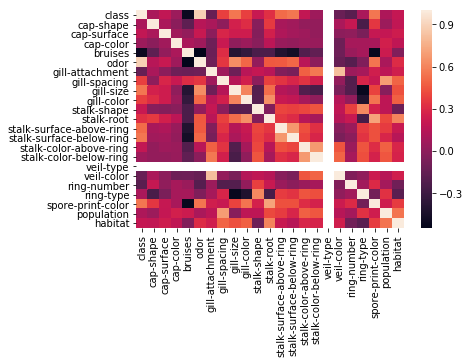

In [15]:
corr = df2.corr()
sns_plot = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

Here we plotted a heatmap of correlation between the diffrent attributes of a mushroom. We can already see that some attributes could provide a lot of information about the edibility of a mushroom for instance bruises, gill-attachement and ring-number. Odor behave much like class which could tell us about the edibility of a mushroom.

In [16]:
from scipy.stats import entropy 

def entropy_class(df,name):
    a = df.groupby('class')[name].value_counts()
#     print(a)
#     print(len(a[0]))
    s = sum(a)
    h = 0
    s_c = 0
    for i in range(len(df2[name].unique())):
        s_c = sum(a[:,i])
#         print('This is sum by column for',i,': ',str(s_c))
        for j in range(len(df.iloc[:,0].unique())):
            try:
#                 print(i,'+',j,': ',a[j,i])
                h+= a[j][i]/s * log2(a[j][i]/s_c)
            except:
                pass
    return -h
    
values = {}
print("H(class) is equal to "+str(entropy(df2.iloc[:, 0])))


print("H(class|bruises) is equal to "+str(entropy_class(df2,'bruises')))
values[entropy_class(df2,'bruises')] = "bruises"
print("H(class|cap-shape) is equal to "+str(entropy_class(df2,'cap-shape')))
values[entropy_class(df2,'cap-shape')] = "cap-shape"
print("H(class|cap-surface) is equal to "+str(entropy_class(df2,'cap-surface')))
values[entropy_class(df2,'cap-surface')] = "cap-surface"
print("H(class|cap-color) is equal to "+str(entropy_class(df2,'cap-color')))
values[entropy_class(df2,'cap-color')] = "cap-color"
print("H(class|odor) is equal to "+str(entropy_class(df2,'odor')))
values[entropy_class(df2,'odor')] = "odor"
print("H(class|gill-attachment) is equal to "+str(entropy_class(df2,'gill-attachment')))
values[entropy_class(df2,'gill-attachment')] = "gill-attachment"
print("H(class|gill-spacing) is equal to "+str(entropy_class(df2,'gill-spacing')))
values[entropy_class(df2,'gill-spacing')] = "gill-spacing"
print("H(class|gill-size) is equal to "+str(entropy_class(df2,'gill-size')))
values[entropy_class(df2,'gill-size')] = "gill-size"
print("H(class|gill-color) is equal to "+str(entropy_class(df2,'gill-color')))
values[entropy_class(df2,'gill-color')] = "gill-color"
print("H(class|stalk-shape) is equal to "+str(entropy_class(df2,'stalk-shape')))
values[entropy_class(df2,'stalk-shape')] = "stalk-shape"
print("H(class|stalk-root) is equal to "+str(entropy_class(df2,'stalk-root')))
values[entropy_class(df2,'stalk-root')] = "stalk-root"
print("H(class|stalk-surface-above-ring) is equal to "+str(entropy_class(df2,'stalk-surface-above-ring')))
values[entropy_class(df2,'stalk-surface-above-ring')] = "stalk-surface-above-ring"
print("H(class|stalk-surface-below-ring) is equal to "+str(entropy_class(df2,'stalk-surface-below-ring')))
values[entropy_class(df2,'stalk-surface-below-ring')] = "stalk-surface-below-ring"
print("H(class|stalk-color-above-ring) is equal to "+str(entropy_class(df2,'stalk-color-above-ring')))
values[entropy_class(df2,'stalk-color-above-ring')] = "stalk-color-above-ring"
print("H(class|stalk-color-below-ring) is equal to "+str(entropy_class(df2,'stalk-color-below-ring')))
values[entropy_class(df2,'stalk-color-below-ring')] = "stalk-color-below-ring"
print("H(class|veil-type) is equal to "+str(entropy_class(df2,'veil-type')))
values[entropy_class(df2,'veil-type')] = "veil-type"
print("H(class|ring-number) is equal to "+str(entropy_class(df2,'ring-number')))
values[entropy_class(df2,'ring-number')] = "ring-number"
print("H(class|ring-type) is equal to "+str(entropy_class(df2,'ring-type')))
values[entropy_class(df2,'ring-type')] = "ring-type"
print("H(class|spore-print-color) is equal to "+str(entropy_class(df2,'spore-print-color')))
values[entropy_class(df2,'spore-print-color')] = "spore-print-color"
print("H(class|population) is equal to "+str(entropy_class(df2,'population')))
values[entropy_class(df2,'population')] = "population"
print("H(class|habitat) is equal to "+str(entropy_class(df2,'habitat')))
values[entropy_class(df2,'habitat')] = "habitat"
print("_________________________________")
import collections
d= collections.OrderedDict(sorted(values.items()))
for e in d.items():
    print(e[1],'has an entropy of: ',e[0])


H(class) is equal to 8.237479288613631
H(class|bruises) is equal to 0.8061888583833858
H(class|cap-shape) is equal to 0.9734452518827197
H(class|cap-surface) is equal to 0.9577432895591672
H(class|cap-color) is equal to 0.9273863580654473
H(class|odor) is equal to 0.10446849782922776
H(class|gill-attachment) is equal to 0.9822860230999174
H(class|gill-spacing) is equal to 0.8820772498655445
H(class|gill-size) is equal to 0.7393762445313111
H(class|gill-color) is equal to 0.5588896822704581
H(class|stalk-shape) is equal to 0.9645734915106412
H(class|stalk-root) is equal to 0.9073472788966988
H(class|stalk-surface-above-ring) is equal to 0.71828419732541
H(class|stalk-surface-below-ring) is equal to 0.7289803794384326
H(class|stalk-color-above-ring) is equal to 0.7385625445311501
H(class|stalk-color-below-ring) is equal to 0.7517924895026601
H(class|veil-type) is equal to 0.9972964080768636
H(class|ring-number) is equal to 0.9464915806719143
H(class|ring-type) is equal to 0.6900178515104

We created a code that orders questions with their relative entropy. We can see like we observed before that odor is the most relevant question to ask first.

<h4>Question 3</h4>
Run the following cell to build a decision tree of depth 1 based on the Mushrooms training dataset. What is the most informing question to ask?

In [21]:
tree = Tree(questions_set, Dataset(train_set),1)
print(tree)

(odor equals n? Entropy gain = 0.76)
	---> True (p_positive = 96.37 %)
	---> False (p_positive = 4.03 %)



<h4>Your answer</h4>
The most informing question is to ask about the presence of an odor. 

<h4>Question 4</h4>
Now run the following cell to build decision trees of maximum depth 0 to 8 and plot their accuracies and maximum depths. What do you notice? Explain your observations.

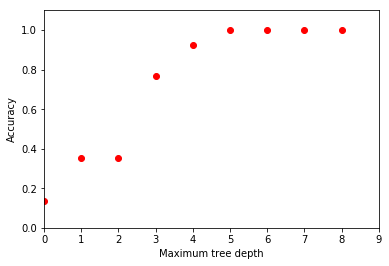

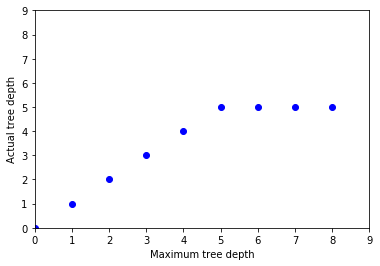

In [22]:
trees = [Tree(questions_set, Dataset(train_set), i) for i in range(9)]
accuracies = [accuracy(trees[i], test_set) for i in range(9)]
depths = [trees[i].get_size() for i in range(9)]

plt.plot(list(range(9)), accuracies, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Maximum tree depth')
plt.axis([0, 9, 0, 1.1])
plt.show()

plt.plot(list(range(9)), depths, 'bo')
plt.ylabel('Actual tree depth')
plt.xlabel('Maximum tree depth')
plt.axis([0, 9, 0, 9])
plt.show()

<h4>Your answer</h4>
We can notice that:<br>
1) the more the tree is deep the more is it accurate<br>
2) From a certain depth(5) we cannot improve accuracy anymore (we obtain with certitude an answer)<br>

For the following you will work with a tree of depth 5. Run the following cell to build it and print it.

In [23]:
tree = Tree(questions_set, Dataset(train_set), 5)
print(tree)

(odor equals n? Entropy gain = 0.76)
	(spore-print-color equals r? Entropy gain = 0.11)
		---> False (p_positive = 0.0 %)
		(stalk-surface-below-ring equals y? Entropy gain = 0.07)
			(ring-type equals e? Entropy gain = 0.86)
				---> False (p_positive = 0.0 %)
				---> True (p_positive = 100.0 %)
			(gill-size equals b? Entropy gain = 0.01)
				---> True (p_positive = 100.0 %)
				(bruises equals t? Entropy gain = 0.35)
					---> False (p_positive = 0.0 %)
					---> True (p_positive = 100.0 %)
	(bruises equals t? Entropy gain = 0.11)
		(stalk-root equals c? Entropy gain = 0.39)
			---> True (p_positive = 100.0 %)
			(stalk-surface-below-ring equals y? Entropy gain = 0.27)
				---> True (p_positive = 100.0 %)
				(habitat equals d? Entropy gain = 0.24)
					---> True (p_positive = 100.0 %)
					---> False (p_positive = 0.0 %)
		---> False (p_positive = 0.0 %)



<h4>Question 5</h4>
Which questions can actually be useful to ask to detect the edibility of a mushroom?

<h4>Your answer</h4>
The order to ask the question is as shown in the picture below
<img src="tree.png">

<h4>Question 6</h4>
You found a large amount of the following mushrooms in your garden. You would like to know whether they are edible or not.

<img src="mushroom_lab3.jpg" width=600 />

You pick one of them and notice it has dark brown spore print. You smell it: it does not have any noticeable odor. The surface below its ring is a bit silky. Do you think that you should eat that mushroom? Justify your answer.

<h4>Your answer</h4>
First of all, the mushroom has no odor(Odor is none?-->True). <br/>
Then it has dark brown spore print(Spore print color  green? -->False).<br/> 
The surface is silky (Stalk surface below ring is scaly?-->False). <br/>
Gill size is narrow (Gill size is broad?--> False). <br/>
Finally the mushroom is not bruised. (Is bruised?--> False)<br/>
So we conclude that the mushroom is edible.

<h4>Question 7</h4>
Your friend prepared a dish with what he called "mushrooms with a very pleasant almond smell that I found in the forest". What do you think of that dish? Justify your answer.

In [32]:
# You can make some tests here to evaluate the edibility of your friend's dish...
questions_set1 = set()
questions_set1.add(('odor', 'a', equals))
tree1 = Tree(questions_set, Dataset(train_set),1)
print(tree1)

(odor equals n? Entropy gain = 0.76)
	---> True (p_positive = 96.37 %)
	---> False (p_positive = 4.03 %)



<h4>Your answer</h4>
We create a new decision tree based on the question "Has the mushroom an alamond smell?". Based on that question, we obtain a decision tree: If a mushroom has an alamond smell we are sure at 96.37% that it is edile.